In [2]:
import json
import pandas as pd
from langdetect import detect
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_paths = [
    '20231012_230826_commit_sharings.json',
    '20231012_232232_hn_sharings.json',
    '20231012_233628_pr_sharings.json',
    '20231012_234250_file_sharings.json',
    '20231012_235128_issue_sharings.json',
    '20231012_235320_discussion_sharings.json'
]

all_data = [] 

for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)

        # first get embedded data from Sources column
        for source in data.get('Sources', []):
            source_type = source.get('Type', '')
            source_id = source.get('ID', '')
            source_url = source.get('URL', '')
            author = source.get('Author', '')
            title = source.get('Title', '')
            RepoName = source.get('RepoName', '')
            RepoLanguage = source.get('RepoLanguage', '')
            created_at = source.get('CreatedAt', '')

            # then get embedded data from ChatgptSharing column
            for chatgpt_sharing in source.get('ChatgptSharing', []):
                chatgpt_url = chatgpt_sharing.get('URL', '')
                status = chatgpt_sharing.get('Status', '')
                date_of_conversation = chatgpt_sharing.get('DateOfConversation', '')
                date_of_access = chatgpt_sharing.get('DateOfAccess', '')
                model_used = chatgpt_sharing.get('Model', '')
                num_prompts = chatgpt_sharing.get('NumberOfPrompts', 0)
                tokens_of_prompts = chatgpt_sharing.get('TokensOfPrompts', 0)
                tokens_of_answers = chatgpt_sharing.get('TokensOfAnswers', 0)

                # lastly, exract the conversation information
                for conversation in chatgpt_sharing.get('Conversations', []):
                    entry = {
                        "SourceType": source_type,
                        "SourceID": source_id,
                        "SourceURL": source_url,
                        "Author": author,
                        "Title": title,
                        "RepoName": RepoName,
                        "RepoLanguage": RepoLanguage,
                        "CreatedAt": created_at,
                        "ChatGPT_URL": chatgpt_url,
                        "Status": status,
                        "DateOfConversation": date_of_conversation,
                        "DateOfAccess": date_of_access,
                        "ModelUsed": model_used,
                        "NumPrompts": num_prompts,
                        "TokensOfPrompts": tokens_of_prompts,
                        "TokensOfAnswers": tokens_of_answers,
                        "Prompt": conversation.get("Prompt", ""),
                        "Answer": conversation.get("Answer", ""),
                        "ListOfCode": conversation.get("ListOfCode", [])
                    }
                    all_data.append(entry)

df = pd.DataFrame(all_data)

In [4]:
df.columns

Index(['SourceType', 'SourceID', 'SourceURL', 'Author', 'Title', 'RepoName',
       'RepoLanguage', 'CreatedAt', 'ChatGPT_URL', 'Status',
       'DateOfConversation', 'DateOfAccess', 'ModelUsed', 'NumPrompts',
       'TokensOfPrompts', 'TokensOfAnswers', 'Prompt', 'Answer', 'ListOfCode'],
      dtype='object')

In [5]:
df.isna().sum()

SourceType               0
SourceID                 0
SourceURL                0
Author                   0
Title                    0
RepoName                 0
RepoLanguage          1882
CreatedAt                0
ChatGPT_URL              0
Status                   0
DateOfConversation       0
DateOfAccess             0
ModelUsed                0
NumPrompts               0
TokensOfPrompts          0
TokensOfAnswers          0
Prompt                   0
Answer                   0
ListOfCode               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SourceType          27093 non-null  object
 1   SourceID            27093 non-null  object
 2   SourceURL           27093 non-null  object
 3   Author              27093 non-null  object
 4   Title               27093 non-null  object
 5   RepoName            27093 non-null  object
 6   RepoLanguage        25211 non-null  object
 7   CreatedAt           27093 non-null  object
 8   ChatGPT_URL         27093 non-null  object
 9   Status              27093 non-null  int64 
 10  DateOfConversation  27093 non-null  object
 11  DateOfAccess        27093 non-null  object
 12  ModelUsed           27093 non-null  object
 13  NumPrompts          27093 non-null  int64 
 14  TokensOfPrompts     27093 non-null  int64 
 15  TokensOfAnswers     27093 non-null  int64 
 16  Prompt              27

In [7]:
df[df.duplicated(["Prompt", "Answer"])]

,SourceType,SourceID,SourceURL,Author,Title,RepoName,RepoLanguage,CreatedAt,ChatGPT_URL,Status,DateOfConversation,DateOfAccess,ModelUsed,NumPrompts,TokensOfPrompts,TokensOfAnswers,Prompt,Answer,ListOfCode
18,commit,,https://github.com/changchiyou/Github-Action-T...,changchiyou,,changchiyou/Github-Action-Test,Python,,https://chat.openai.com/share/7cf2816f-13ea-40...,200,"August 22, 2023",2023-10-12 23:53:36.382788,Default (GPT-3.5),3,396,770,i got \n\n```\n============================= t...,ChatGPTIt looks like you're encountering an is...,[]
19,commit,,https://github.com/changchiyou/Github-Action-T...,changchiyou,,changchiyou/Github-Action-Test,Python,,https://chat.openai.com/share/7cf2816f-13ea-40...,200,"August 22, 2023",2023-10-12 23:53:36.382788,Default (GPT-3.5),3,396,770,do i need to install `ptest`(not `pytest`) in ...,"ChatGPTYes, if your project relies on a module...","[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
141,commit,,https://github.com/bulatkhu/programmierung-und...,bulatkhu,,bulatkhu/programmierung-und-programmiersprachen,Java,,https://chat.openai.com/share/f082ae67-9f57-4a...,200,"September 18, 2023",2023-10-12 23:54:03.002218,Advanced Data Analysis,3,1040,766,Composite-Muster\nDie Verzeichnisstruktur Ihre...,ChatGPTIhr Code implementiert das Composite-Mu...,[]
142,commit,,https://github.com/bulatkhu/programmierung-und...,bulatkhu,,bulatkhu/programmierung-und-programmiersprachen,Java,,https://chat.openai.com/share/f082ae67-9f57-4a...,200,"September 18, 2023",2023-10-12 23:54:03.002218,Advanced Data Analysis,3,1040,766,mach mir noch so eine aufgabe zu dem selben mu...,ChatGPTNatürlich! Hier ist eine neue Aufgabe z...,[]
150,commit,,https://github.com/pbrudny/jobsforit-de/commit...,pbrudny,,pbrudny/jobsforit-de,CSS,,https://chat.openai.com/share/ba3847d4-8a7a-4f...,200,"September 10, 2023",2023-10-12 23:54:09.877351,GPT-4,4,2525,1164,Seeing my package.json suggest updates which w...,ChatGPTYour package.json file lists a good num...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27008,discussion,,https://github.com/nv-morpheus/Morpheus/discus...,nyck33,"[DOC]: Can I use Morpheus without Blue Shield,...",nv-morpheus/Morpheus,Python,2023-09-21T10:52:30Z,https://chat.openai.com/share/425a2879-ccfd-48...,200,"September 22, 2023",2023-10-12 23:52:43.916219,Advanced Data Analysis,11,773,6413,So can you write a Python driver that uses ext...,ChatGPTCreating a Python driver to mimic the s...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
27009,discussion,,https://github.com/nv-morpheus/Morpheus/discus...,nyck33,"[DOC]: Can I use Morpheus without Blue Shield,...",nv-morpheus/Morpheus,Python,2023-09-21T10:52:30Z,https://chat.openai.com/share/425a2879-ccfd-48...,200,"September 22, 2023",2023-10-12 23:52:43.916219,Advanced Data Analysis,11,773,6413,"ok, so correct me if I""m wrong but this is the...",ChatGPTYou have the workflow largely correct. ...,[]
27010,discussion,,https://github.com/nv-morpheus/Morpheus/discus...,nyck33,"[DOC]: Can I use Morpheus without Blue Shield,...",nv-morpheus/Morpheus,Python,2023-09-21T10:52:30Z,https://chat.openai.com/share/425a2879-ccfd-48...,200,"September 22, 2023",2023-10-12 23:52:43.916219,Advanced Data Analysis,11,773,6413,I think so but step 1 I think I might want to ...,ChatGPTYou're correct; having continuous and r...,[]
27011,discussion,,https://github.com/nv-morpheus/Morpheus/discus...,nyck33,"[DOC]: Can I use Morpheus without Blue Shield,...",nv-morpheus/Morpheus,Python,2023-09-21T10:52:30Z,https://chat.openai.com/share/425a2879-ccfd-48...,200,"September 22, 2023",2023-10-12 23:52:43.916219,Advanced Data Analysis,11,773,6413,Can you write the code for these steps? ```Ste...,ChatGPTSure! Let's start with a high-level ove...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."


In [45]:
# noticed duplicate prompt/answer pairs, so remove these
df = df.drop_duplicates(subset = ["Prompt", "Answer"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18163 entries, 0 to 27092
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SourceType          18163 non-null  object
 1   SourceID            18163 non-null  object
 2   SourceURL           18163 non-null  object
 3   Author              18163 non-null  object
 4   Title               18163 non-null  object
 5   RepoName            18163 non-null  object
 6   RepoLanguage        16497 non-null  object
 7   CreatedAt           18163 non-null  object
 8   ChatGPT_URL         18163 non-null  object
 9   Status              18163 non-null  int64 
 10  DateOfConversation  18163 non-null  object
 11  DateOfAccess        18163 non-null  object
 12  ModelUsed           18163 non-null  object
 13  NumPrompts          18163 non-null  int64 
 14  TokensOfPrompts     18163 non-null  int64 
 15  TokensOfAnswers     18163 non-null  int64 
 16  Prompt              18163 n

In [5]:
df.head()

,SourceType,SourceID,SourceURL,Author,Title,RepoName,RepoLanguage,CreatedAt,ChatGPT_URL,Status,DateOfConversation,DateOfAccess,ModelUsed,NumPrompts,TokensOfPrompts,TokensOfAnswers,Prompt,Answer,ListOfCode
0,commit,,https://github.com/grnpin/textbox/commit/fa335...,grnpin,,grnpin/textbox,HTML,,https://chat.openai.com/share/4bad57dd-9636-4b...,200,"September 20, 2023",2023-10-12 23:53:27.348018,Default (GPT-3.5),1,330,556,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
1,commit,,https://github.com/grnpin/textbox/commit/0dfc4...,grnpin,,grnpin/textbox,HTML,,https://chat.openai.com/share/1fd7ffc2-9264-45...,200,"September 9, 2023",2023-10-12 23:53:27.833077,Default,1,51,160,このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...,[]
2,commit,,https://github.com/grnpin/textbox/commit/811d0...,grnpin,,grnpin/textbox,HTML,,https://chat.openai.com/share/99d2d02f-7e3b-43...,200,"September 7, 2023",2023-10-12 23:53:28.345040,Default,1,916,115,refactor this code.\n\n<!DOCTYPE html>\n<html>...,ChatGPTHere's a refactored version of your HTM...,[]
3,commit,,https://github.com/bh679/MindfulAI2.0/commit/e...,bh679,,bh679/MindfulAI2.0,CSS,,https://chat.openai.com/share/90ebe55e-bd60-47...,200,"August 8, 2023",2023-10-12 23:53:29.830292,Advanced Data Analysis,6,5774,1898,server.js\n// Required libraries\nimport cors ...,ChatGPTYou've shared multiple pieces of server...,[]
4,commit,,https://github.com/bh679/MindfulAI2.0/commit/e...,bh679,,bh679/MindfulAI2.0,CSS,,https://chat.openai.com/share/90ebe55e-bd60-47...,200,"August 8, 2023",2023-10-12 23:53:29.830292,Advanced Data Analysis,6,5774,1898,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",ChatGPTIt looks like you're having issues with...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."


In [6]:
df.tail()

,SourceType,SourceID,SourceURL,Author,Title,RepoName,RepoLanguage,CreatedAt,ChatGPT_URL,Status,DateOfConversation,DateOfAccess,ModelUsed,NumPrompts,TokensOfPrompts,TokensOfAnswers,Prompt,Answer,ListOfCode
27088,discussion,,https://github.com/ZoeLeBlanc/is578-intro-dh/d...,ZoeLeBlanc,AI & CLI Assignment,ZoeLeBlanc/is578-intro-dh,HTML,2023-08-31T16:33:05Z,https://chat.openai.com/share/cfe2a21a-29e0-47...,200,"September 8, 2023",2023-10-12 23:53:17.501679,Default (GPT-3.5),6,156,1830,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
27089,discussion,,https://github.com/ZoeLeBlanc/is578-intro-dh/d...,ZoeLeBlanc,AI & CLI Assignment,ZoeLeBlanc/is578-intro-dh,HTML,2023-08-31T16:33:05Z,https://chat.openai.com/share/cfe2a21a-29e0-47...,200,"September 8, 2023",2023-10-12 23:53:17.501679,Default (GPT-3.5),6,156,1830,now create a how to use the command line to cr...,ChatGPTTo create a text file with the content ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
27090,discussion,,https://github.com/ZoeLeBlanc/is578-intro-dh/d...,ZoeLeBlanc,AI & CLI Assignment,ZoeLeBlanc/is578-intro-dh,HTML,2023-08-31T16:33:05Z,https://chat.openai.com/share/cfe2a21a-29e0-47...,200,"September 8, 2023",2023-10-12 23:53:17.501679,Default (GPT-3.5),6,156,1830,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
27091,discussion,,https://github.com/ZoeLeBlanc/is578-intro-dh/d...,ZoeLeBlanc,AI & CLI Assignment,ZoeLeBlanc/is578-intro-dh,HTML,2023-08-31T16:33:05Z,https://chat.openai.com/share/cfe2a21a-29e0-47...,200,"September 8, 2023",2023-10-12 23:53:17.501679,Default (GPT-3.5),6,156,1830,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."
27092,discussion,,https://github.com/orgs/netket/discussions/1482,MrAAafa99,Exploring the Plotting of Pair Correlation Fun...,netket/netket,Python,2023-05-25T15:11:27Z,https://chat.openai.com/share/caaa9e43-860a-46...,200,"August 16, 2023",2023-10-12 23:53:19.322053,Default (GPT-3.5),2,36,616,how do I assign error bars to the entries of a...,ChatGPTAssigning error bars to histogram entri...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '..."


In [7]:
df.describe()

,Status,NumPrompts,TokensOfPrompts,TokensOfAnswers
count,18163.0,18163.000000,18163.000000,18163.000000
mean,200.0,51.151462,8015.766228,16204.392556
std,0.0,109.315835,24978.755346,28782.043523
min,200.0,1.000000,4.000000,3.000000
25%,200.0,6.000000,382.000000,1808.000000
50%,200.0,17.000000,1311.000000,5704.000000
75%,200.0,42.000000,4901.000000,15075.000000
max,200.0,574.000000,183736.000000,131131.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18163 entries, 0 to 27092
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SourceType          18163 non-null  object
 1   SourceID            18163 non-null  object
 2   SourceURL           18163 non-null  object
 3   Author              18163 non-null  object
 4   Title               18163 non-null  object
 5   RepoName            18163 non-null  object
 6   RepoLanguage        16497 non-null  object
 7   CreatedAt           18163 non-null  object
 8   ChatGPT_URL         18163 non-null  object
 9   Status              18163 non-null  int64 
 10  DateOfConversation  18163 non-null  object
 11  DateOfAccess        18163 non-null  object
 12  ModelUsed           18163 non-null  object
 13  NumPrompts          18163 non-null  int64 
 14  TokensOfPrompts     18163 non-null  int64 
 15  TokensOfAnswers     18163 non-null  int64 
 16  Prompt              18163 n

Let's see how some of the data is distributed

In [9]:
df['Author'].value_counts()

Author
bennyp85        776
balo215         573
tisztamo        497
caseywschmid    456
i-a-n           289
               ... 
AshminJayson      1
caryden           1
yipkaiwing        1
pray92            1
MrAAafa99         1
Name: count, Length: 1554, dtype: int64

<Figure size 600x400 with 0 Axes>

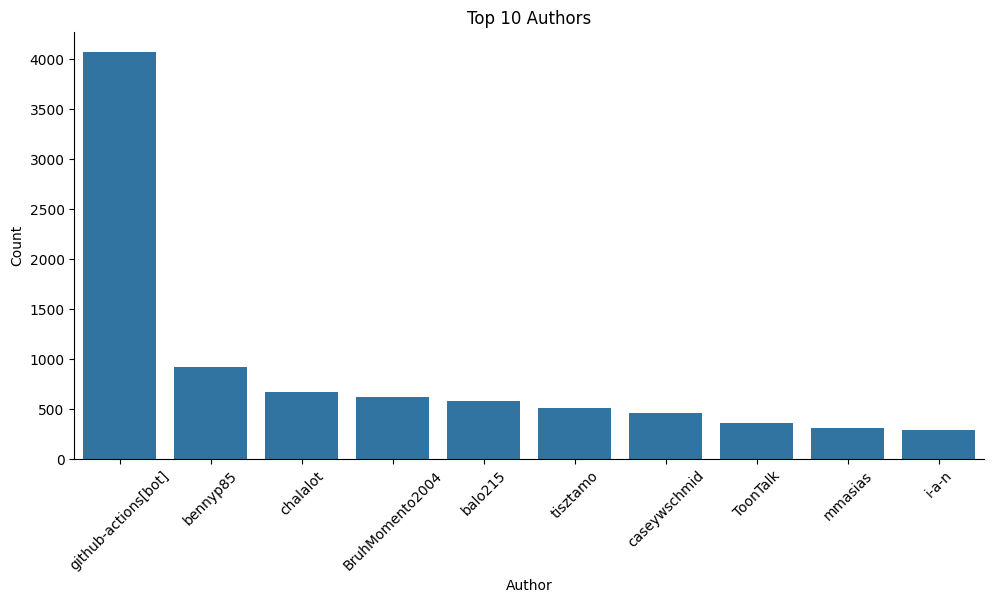

In [8]:
# plot top 10 authors
top_10_authors = df["Author"].value_counts().head(10).reset_index()
top_10_authors.columns = ["Author", "Count"]
plt.figure(figsize=(6, 4))
sns.catplot(x="Author", y="Count", kind="bar", data=top_10_authors, height=5, aspect=2)
plt.xticks(rotation=45)
plt.title('Top 10 Authors')
plt.show()

In [9]:
# information on repository used
df['RepoName'].value_counts().sort_index()

RepoName
                                        1143
0x79de/0x79de.github.io                    1
10-Kirito/Notes                            5
152334H/152334H.github.io                  1
1766left/EasyFill                          9
                                        ... 
zsviczian/obsidian-excalidraw-plugin       3
zudsniper/learn_from_cgpt                 12
zumatt/personalWebsite                     7
zyhzsh/S7-Doc                             30
zzzeek/sqlalchemy                         24
Name: count, Length: 1558, dtype: int64

In [10]:
# languages used in repositories
df['RepoLanguage'].value_counts()

RepoLanguage
CSS        10194
HTML        2651
Python      2229
C++         1319
            1143
           ...  
Verilog        1
APL            1
Groovy         1
Nim            1
MDX            1
Name: count, Length: 75, dtype: int64

In [11]:
df['RepoLanguage'].unique()

array(['HTML', 'CSS', 'JavaScript', 'Python', 'Batchfile', None, 'Lua',
       'Jinja', 'Shell', 'Java', 'C', 'Dockerfile', 'C#', 'Pascal', 'Go',
       'EJS', 'GAML', 'Cython', '', 'TypeScript', 'Jupyter Notebook',
       'Vue', 'PHP', 'Kotlin', 'C++', 'Solidity', 'Emacs Lisp', 'F#',
       'Dart', 'MDX', 'PowerShell', 'Assembly', 'ASL', 'APL',
       'API Blueprint', 'ANTLR', 'CodeQL', 'R', 'Arc',
       'DIGITAL Command Language', 'Astro', 'Rust', 'PLSQL', 'PLpgSQL',
       'Haskell', 'GLSL', 'MATLAB', 'Procfile', 'Makefile', 'HCL', 'Awk',
       'ShaderLab', 'AutoHotkey', 'Julia', 'Apex', 'TeX', 'Qt Script',
       'Swift', 'Asymptote', 'Clojure', 'Mustache', 'SCSS', 'NASL', 'Coq',
       'Nix', 'Nunjucks', 'AppleScript', 'Ruby', 'Verilog', 'Perl',
       'Game Maker Language', 'Zig', 'Objective-C', 'Groovy', 'Nim',
       'SystemVerilog'], dtype=object)

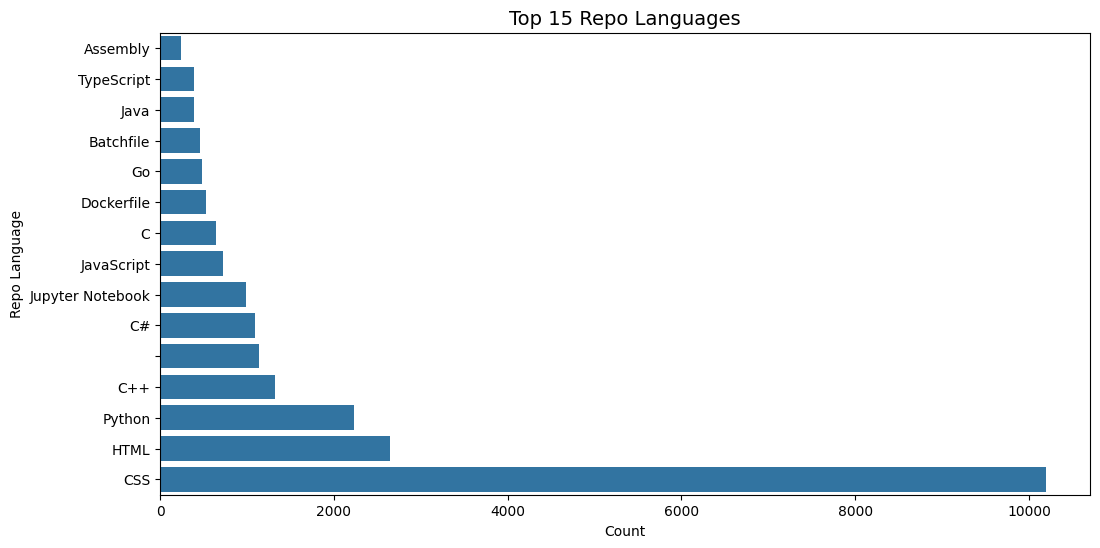

In [12]:
# plot most common languages used
top_15_languages = df["RepoLanguage"].value_counts().head(15).reset_index()
top_15_languages.columns = ["RepoLanguage", "Count"]
top_15_languages = top_15_languages.sort_values(by='Count', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="RepoLanguage", data=top_15_languages)

plt.title('Top 15 Repo Languages', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Repo Language')

plt.show()


Let's subset the data to only focus on the model, prompts, and answers

In [13]:
df_rq1 = df[['ModelUsed', 'Prompt', 'Answer']]

df_rq1.head()

,ModelUsed,Prompt,Answer
0,Default (GPT-3.5),このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...
1,Default,このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...
2,Default,refactor this code.\n\n<!DOCTYPE html>\n<html>...,ChatGPTHere's a refactored version of your HTM...
3,Advanced Data Analysis,server.js\n// Required libraries\nimport cors ...,ChatGPTYou've shared multiple pieces of server...
4,Advanced Data Analysis,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",ChatGPTIt looks like you're having issues with...


First, let's combine all the default models into one category

In [14]:
df_rq1.loc[:, 'ModelUsed'] = df_rq1['ModelUsed'].replace(
    ['Model: Default', 'Default'], 'Default (GPT-3.5)'
)

df_rq1.head()

,ModelUsed,Prompt,Answer
0,Default (GPT-3.5),このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...
1,Default (GPT-3.5),このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...
2,Default (GPT-3.5),refactor this code.\n\n<!DOCTYPE html>\n<html>...,ChatGPTHere's a refactored version of your HTM...
3,Advanced Data Analysis,server.js\n// Required libraries\nimport cors ...,ChatGPTYou've shared multiple pieces of server...
4,Advanced Data Analysis,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",ChatGPTIt looks like you're having issues with...


For interpretability, we will also remove non-english prompts/answers. Additionally, we will remove 'ChatGPT' at the start of each answer as this will skew results if we care about word counts/frequencies.

In [15]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# filter on prompt and answer columns, also remove ChatGPT from the start of Answer
df_rq1_filtered = df_rq1[df_rq1['Prompt'].apply(is_english) & df_rq1['Answer'].apply(is_english)]
df_rq1_filtered.loc[:, 'Answer'] = df_rq1_filtered['Answer'].str.replace(r'^ChatGPT', '', regex  = True)

df_rq1_filtered.head()

,ModelUsed,Prompt,Answer
2,Default (GPT-3.5),refactor this code.\n\n<!DOCTYPE html>\n<html>...,Here's a refactored version of your HTML and J...
3,Advanced Data Analysis,server.js\n// Required libraries\nimport cors ...,You've shared multiple pieces of server code t...
4,Advanced Data Analysis,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",It looks like you're having issues with your s...
5,Advanced Data Analysis,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,"From the logs and the code you provided, there..."
6,Advanced Data Analysis,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,The logs indicate two main issues:The module P...


In [16]:
df_rq1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21215 entries, 2 to 27092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ModelUsed  21215 non-null  object
 1   Prompt     21215 non-null  object
 2   Answer     21215 non-null  object
dtypes: object(3)
memory usage: 663.0+ KB


Now that the answer column should be mostly clean, we can start doing some analysis. Let's start with word counts, a simple metric to calculate.

In [17]:
df_rq1_clean = df_rq1_filtered.copy()
df_rq1_clean.loc[:, 'WordCount'] = df_rq1_clean['Answer'].apply(lambda x: len(x.split()))

df_rq1_clean.head()

,ModelUsed,Prompt,Answer,WordCount
2,Default (GPT-3.5),refactor this code.\n\n<!DOCTYPE html>\n<html>...,Here's a refactored version of your HTML and J...,78
3,Advanced Data Analysis,server.js\n// Required libraries\nimport cors ...,You've shared multiple pieces of server code t...,472
4,Advanced Data Analysis,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",It looks like you're having issues with your s...,312
5,Advanced Data Analysis,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,"From the logs and the code you provided, there...",242
6,Advanced Data Analysis,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,The logs indicate two main issues:The module P...,242


### What types of issues (bugs, feature requests, theoretical questions, etc.) do developers most commonly present to ChatGPT?

#### Firstly, decide the keywords of different types of issues

In [18]:
keyword_categories = {
    "Bug Reports": ["error", "bug", "crash", "exception", "fail", "issue", "fix"],
    "Feature Requests": ["feature", "enhance", "add support", "improve", "implement"],
    "Theoretical Questions": ["explain", "theory", "why", "difference", "how does"],
    "Performance Issues": ["slow", "optimize", "bottleneck", "latency", "performance"],
    "Code Help": ["how to", "example", "sample", "syntax", "help", "debug"]
}

#### Secondly, clean Prompt

In [19]:
def clean_prompt(prompt):

    # keep contractions good
    answer = re.sub(r"(?<=\w)'(?=\w)", "", prompt)
    # take out punctuation, add space
    answer = re.sub(r"[.,;!?:]", " ", prompt)
    # deal with any additional symbols, characters, etc.
    answer = re.sub(r"[^\w\s]", "", prompt)
    answer = answer.lower()

    return answer

df_rq1_clean_new = df_rq1_clean.copy()
df_rq1_clean_new.loc[:, 'Prompt'] = df_rq1_clean_new['Prompt'].apply(clean_prompt)

df_rq1_clean_new.head()

,ModelUsed,Prompt,Answer,WordCount
2,Default (GPT-3.5),refactor this code\n\ndoctype html\nhtml\n he...,Here's a refactored version of your HTML and J...,78
3,Advanced Data Analysis,serverjs\n required libraries\nimport cors fro...,You've shared multiple pieces of server code t...,472
4,Advanced Data Analysis,packagejson\n\n name mindfulai\n version 000...,It looks like you're having issues with your s...,312
5,Advanced Data Analysis,\nhomebitnamipm2logsmindfulaiout0log last 15 l...,"From the logs and the code you provided, there...",242
6,Advanced Data Analysis,\nhomebitnamipm2logsmindfulaiout0log last 15 l...,The logs indicate two main issues:The module P...,242


In [20]:
def count_keywords(text, category_keywords):
    text = text.lower() if isinstance(text, str) else ""
    return sum(text.count(keyword) for keyword in category_keywords)

category_counts = {category: 0 for category in keyword_categories}
for category, keywords in keyword_categories.items():
    category_counts[category] += df["Prompt"].apply(lambda x: count_keywords(x, keywords)).sum()
    category_counts[category] += df["Answer"].apply(lambda x: count_keywords(x, keywords)).sum()


In [21]:
category_df = pd.DataFrame(category_counts.items(), columns=["Issue Type", "Count"])
category_df.sort_values('Count')
category_df

,Issue Type,Count
0,Bug Reports,30805
1,Feature Requests,14226
2,Theoretical Questions,4688
3,Performance Issues,3158
4,Code Help,24911


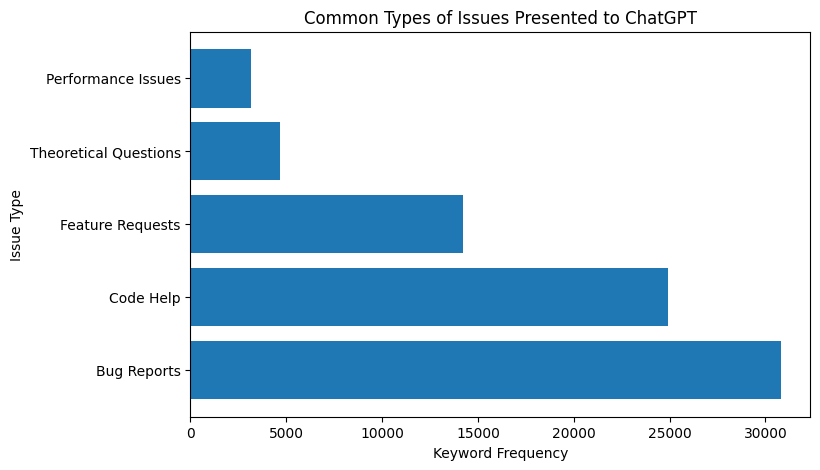

In [22]:
category_df = pd.DataFrame(category_counts.items(), columns=["Issue Type", "Count"])
category_df = category_df.sort_values('Count')

plt.figure(figsize=(8, 5))
    
plt.barh(category_df["Issue Type"], category_df["Count"])
plt.xlabel("Keyword Frequency")
plt.ylabel("Issue Type")
plt.title("Common Types of Issues Presented to ChatGPT")
plt.gca().invert_yaxis()
plt.show()

### How many turns does it take on average to reach a conclusion? What is the typical structure of conversations between developers and ChatGPT? 

In [23]:
mean_turns = df["NumPrompts"].mean()
median_turns = df["NumPrompts"].median()
mode_turns = df["NumPrompts"].mode()[0]

print(f"Mean NumPrompts: {mean_turns:.2f}")
print(f"Median NumPrompts: {median_turns}")
print(f"Most common NumPrompts (Mode): {mode_turns}")


Mean NumPrompts: 48.32
Median NumPrompts: 23.0
Most common NumPrompts (Mode): 64


The mean number of prompts per conversation is 51.15, which suggests that interactions tend to be long and multi-turn.

C:\Users\kirki\AppData\Local\Temp\ipykernel_25280\2602114733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NumPrompts", y="Count", data=top_NumPrompts, palette="Blues_r")


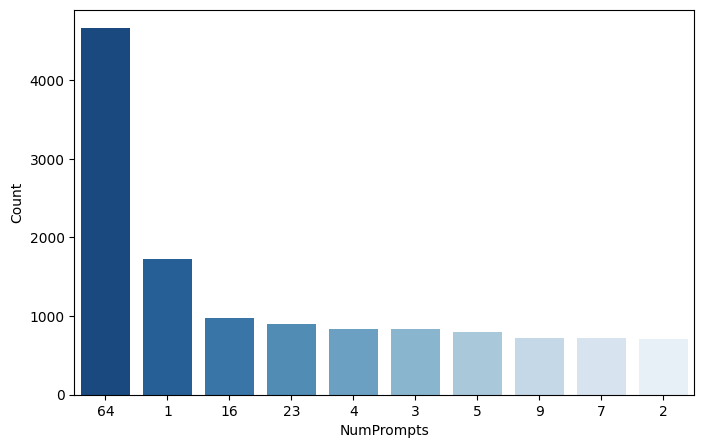

In [24]:
top_NumPrompts = df["NumPrompts"].value_counts().head(10).reset_index()
top_NumPrompts.columns = ["NumPrompts", "Count"]
top_NumPrompts["NumPrompts"] = top_NumPrompts["NumPrompts"].astype(str) 
top_NumPrompts = top_NumPrompts.sort_values(by="Count", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="NumPrompts", y="Count", data=top_NumPrompts, palette="Blues_r")
plt.show()

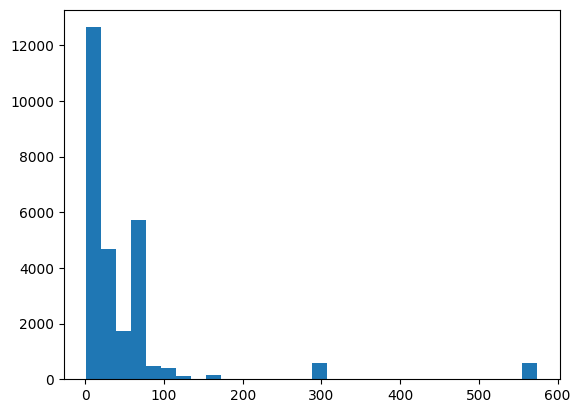

In [25]:
# df['NumPrompts'].hist(bins=20)
plt.hist(df['NumPrompts'], bins=30)
plt.show()